In [80]:
import re
import time
import requests
import numpy as np
import pandas as pd
from textblob import TextBlob, Word
from scrapy.http import TextResponse
import time
import requests
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from selenium import webdriver
import selenium.webdriver.common.keys as Keys
import time
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
##estate.am

In [55]:
def scrap_info(url):
    """Following function scrap information for single page"""
    page = requests.get(url)
    response = TextResponse(url=page.url,body=page.text,encoding="utf-8")
    try:##some listings do not have address variable
        address=response.css("strong[class='addr']::text").extract()[0]
    except:
        address=""
    size=response.xpath('//span[@class="ruler"]/text()').extract()[0]
    size=re.sub("\s.+","",size)
    try:##some listings do not have price variable
        price=response.xpath("//div[@class='price-w']/text()").re("\d.*\d")[0]
        price=re.sub(",","",price)
    except:
        price=""
    return address,size,price

In [48]:
def get_links(url):
    """Gets all listing's hyperlinks from primary page"""
    base='https://www.estate.am'
    page = requests.get(url)
    response = TextResponse(url=page.url,body=page.text,encoding="utf-8")
    urls=response.css("table[class='styled']>tbody a::attr(href)").extract()
    links=[base + i for i in urls]
    return links


In [49]:
pages=["https://www.estate.am/"+"en?page={}".format(i) for i in range(1,256)]

In [56]:
links=[]
for i in pages[:3]: ##getting hrefs for 3 pages
    links.extend(get_links(i))
links[:10]#printing first 10

['https://www.estate.am/en/3-rooms-apartment-sale-in-downtown-yerevan-d92804',
 'https://www.estate.am/en/4-rooms-apartment-sale-in-downtown-yerevan-d98593',
 'https://www.estate.am/en/4-rooms-apartment-sale-in-downtown-yerevan-d85472',
 'https://www.estate.am/en/3-rooms-apartment-sale-in-downtown-yerevan-d87902',
 'https://www.estate.am/en/3-rooms-apartment-sale-in-downtown-yerevan-d87903',
 'https://www.estate.am/en/4-rooms-apartment-sale-in-downtown-yerevan-d89211',
 'https://www.estate.am/en/4-rooms-apartment-sale-in-downtown-yerevan-d91000',
 'https://www.estate.am/en/2-rooms-apartment-sale-in-downtown-yerevan-d91095',
 'https://www.estate.am/en/3-rooms-apartment-sale-in-downtown-yerevan-d91811',
 'https://www.estate.am/en/4-rooms-apartment-sale-in-center-yerevan-d92330']

In [51]:
addresses=[]
sizes=[]
prices=[]
for i in links:
    address,size,price=scrap_info(i)##we assign 3 variables at once as our function returns 3 objects
    addresses.append(address)
    sizes.append(size)
    prices.append(price)

In [54]:
df=pd.DataFrame({"Address":addresses,"Size":sizes,"Price":prices})
df.head()

,Address,Size,Price
0,Tamanyan,136,500000
1,Arami,200,440000
2,Amiryan,300,850000
3,Abovyan,114,250000
4,Abovyan,97,


In [57]:
data=pd.read_csv("data.csv")
data.head()

,quotes,authors
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


In [58]:
def get_sent(text):
    """calculating sentiment for a given text"""
    sentiment=TextBlob(text).sentiment[0]
    return sentiment

data["sentiment"]=data["quotes"].apply(get_sent) ##applying the defined function to a columns

data.head()

,quotes,authors,sentiment
0,“The world as we have created it is a process ...,Albert Einstein,0.000000
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,0.300000
2,“There are only two ways to live your life. On...,Albert Einstein,0.003788
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,-0.050000
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,-0.277778


In [62]:
sw=stopwords.words("english")

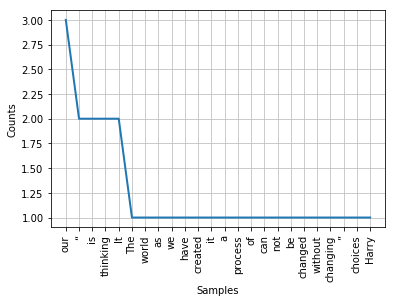

In [74]:
##creating one big textblob to get most frequent words
text=TextBlob("")
for i in data.quotes.tolist():
    text=text+TextBlob(i)
    
freq = nltk.FreqDist(text.words[:30])
freq.plot()

### TF-IDF vectorization

In [82]:
quotes=data["quotes"]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(quotes)
print(tfidf_matrix.shape)

(100, 663)


In [85]:
features = tfidf_vectorizer.get_feature_names()
data = tfidf_matrix.toarray()
tfidf_df = pd.DataFrame(data,columns=features)
tfidf_df.head()

,000,10,abilities,about,above,absolutely,absurdities,accept,across,act,...,writing,written,wrote,wrung,year,you,youer,your,yours,yourself
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.297679,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153781,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.573377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


# selenium

In [6]:
##login into codeacademy.com


from selenium import webdriver
import selenium.webdriver.common.keys as Keys
import time
login="DataScientist-Scraper"
password="scrapinghub"

url = 'https://www.codecademy.com/login'
wd=webdriver.Chrome()
wd.get(url)
enter_user = wd.find_element_by_css_selector('input[type="text"]')
enter_user.send_keys(login)
enter_pass = wd.find_element_by_css_selector('input[type="password"]') 
enter_pass.send_keys(password)
login_elem = wd.find_element_by_id("user_submit")
login_elem.click()
time.sleep(3)
page=wd.page_source
type(page)



str

In [7]:
wd.close()

In [90]:
text = "I'm Jonh and I'm 12 year old, Jack is 23 and Suzan is 45 and 2132 they all earning $100"

import re
ages=re.findall('\s\d{2}\s',text) #getting only ages
names=re.findall(r'[A-Z][a-z]+',text)
name_age=dict(zip(names,ages))
print(name_age)

{'Jonh': ' 12 ', 'Jack': ' 23 ', 'Suzan': ' 45 '}


In [91]:
my_t = "My name is Harry, my e-mail is HarryPotter@aua.am, I need to send my statement of purpose to careers@aua.am"
print (re.sub(r"@[a-z0-9.-]+",'@hogwarts.com',my_t))#changing email domain


My name is Harry, my e-mail is HarryPotter@hogwarts.com, I need to send my statement of purpose to careers@hogwarts.com
